In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from unidecode import unidecode

In [22]:
# Função para carregar dados de renda e unir com os distritos
def carregar_dados_renda(arquivo_excel, sheet_name):
    """Carrega os dados de renda e retorna um DataFrame."""
    df_renda = pd.read_excel(arquivo_excel, sheet_name=sheet_name, skiprows=1)
    
    # Remover acentos e converter para maiúsculas nos nomes dos distritos
    df_renda['Distritos'] = df_renda['Distritos'].apply(lambda x: unidecode(str(x)).upper())
    
    # Converter a coluna 'Renda Média' para o formato float
    df_renda['Renda Média'] = df_renda['Renda Média'].apply(lambda x: float(str(x).replace('.', '').replace(',', '.')))
    
    return df_renda


In [23]:

# Função para plotar distritos com cores baseadas na renda
def plotar_distritos_renda(sp_gdf, distritos_gdf, df_renda, coluna_renda='Renda Média'):
    """Plota os distritos com cores baseadas na renda."""
    
    # Unir os dados de renda com os dados geográficos dos distritos
    distritos_gdf = distritos_gdf.merge(df_renda, left_on='NOME_DIST', right_on='Distritos', how='left')
    
    # Definir a normalização das cores baseada na renda
    norm = Normalize(vmin=distritos_gdf[coluna_renda].min(), vmax=distritos_gdf[coluna_renda].max())
    cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotar o contorno de São Paulo
    sp_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Plotar os distritos com as cores baseadas na renda
    distritos_gdf['color'] = distritos_gdf[coluna_renda].apply(lambda x: cmap(norm(x)))
    distritos_gdf.plot(ax=ax, color=distritos_gdf['color'], edgecolor='black')
    
    # Adicionar a legenda
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Apenas para gerar a barra de cores corretamente
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Renda Média')
    
    # Título
    plt.title('Distritos de São Paulo pela Renda Média', fontsize=15)
    
    # Mostrar o gráfico
    plt.show()

In [24]:
# Caminhos para os arquivos
sao_paulo_geojson = 'sao_paulo_contorno.geojson'
distritos_geojson = 'distritos.geojson'
arquivo_renda = 'Renda_Por_Faixa_Distritos.xlsx'

# Carregar o GeoJSON do contorno de São Paulo
sp_gdf = gpd.read_file(sao_paulo_geojson)

# Carregar o GeoJSON dos distritos
distritos_gdf = gpd.read_file(distritos_geojson)

# Carregar os dados de renda
df_renda = carregar_dados_renda(arquivo_renda,'Renda Média')

C:\Users\Denil\AppData\Local\Temp\ipykernel_2728\935072378.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho


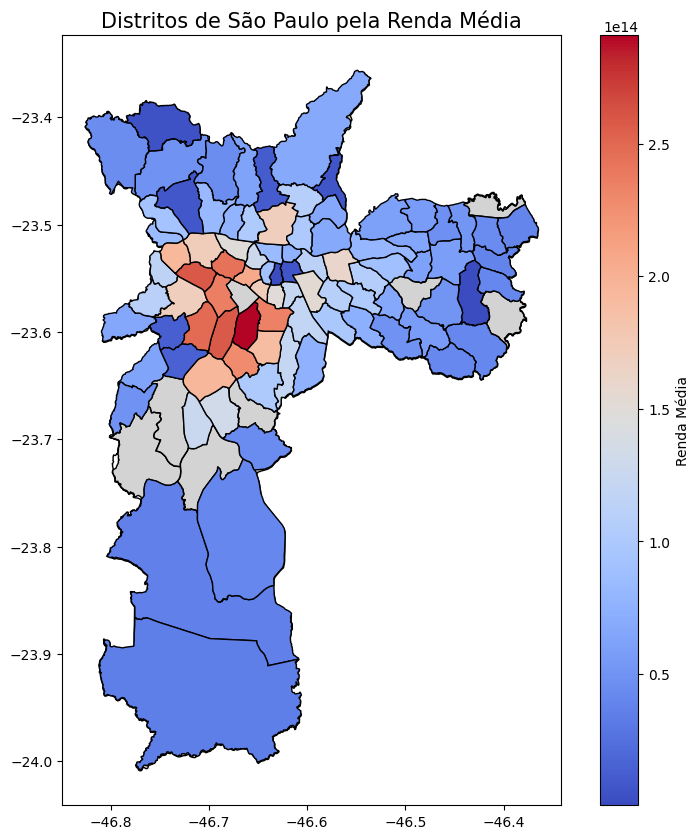

In [25]:
# Plotar os distritos coloridos pela renda
plotar_distritos_renda(sp_gdf, distritos_gdf, df_renda)

In [26]:
from matplotlib.colors import ListedColormap

In [27]:
# Função para plotar distritos com cores baseadas nos domicílios
def plotar_distritos_domicilios(sp_gdf, distritos_gdf, df_analises, coluna_domicilios):
    """Plota os distritos com cores baseadas no número de domicílios."""
    
    # Unir os dados de análise com os dados geográficos dos distritos
    distritos_gdf = distritos_gdf.merge(df_analises, left_on='NOME_DIST', right_on='Distritos', how='left')
    
    # Definir a normalização das cores baseada no número de domicílios
    norm = Normalize(vmin=distritos_gdf[coluna_domicilios].min(), vmax=distritos_gdf[coluna_domicilios].max())
    cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotar o contorno de São Paulo
    sp_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Plotar os distritos com as cores baseadas no número de domicílios
    distritos_gdf['color'] = distritos_gdf[coluna_domicilios].apply(lambda x: cmap(norm(x)))
    distritos_gdf.plot(ax=ax, color=distritos_gdf['color'], edgecolor='black')
    
    # Adicionar a legenda
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Apenas para gerar a barra de cores corretamente
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(coluna_domicilios)
    
    # Título
    plt.title(f'Distritos pelo número de {coluna_domicilios}', fontsize=15)
    
    # Mostrar o gráfico
    plt.show()

In [28]:
# Função para plotar distritos com aderência HIS² ou HMP
def plotar_distritos_aderencia(sp_gdf, distritos_gdf, df_analises, coluna_share, titulo):
    """Plota os distritos com cores baseadas na aderência (HIS² ou HMP)."""
    
    # Unir os dados de análise com os dados geográficos dos distritos
    distritos_gdf = distritos_gdf.merge(df_analises, left_on='NOME_DIST', right_on='Distritos', how='left')
    
    # Definir as cores para os níveis de aderência
    cmap_aderencia = ListedColormap(['green', 'yellow', 'red'])  # Baixo, Médio, Alto
    
    # Definir a lógica de aderência para HIS² ou HMP, ajustando para porcentagem
    def aderencia_classificacao(share):
        if share < 0.25:  # Considerando que os valores estão de 0 a 100
            return 'Baixo'
        elif 0.25 <= share <= 0.35:  # 25% a 35%
            return 'Médio'
        else:  # Maior que 35%
            return 'Alto'
    
    # Aplicar a classificação aos distritos
    distritos_gdf['Aderência'] = distritos_gdf[coluna_share].apply(aderencia_classificacao)
    
    # Mapa de cores para cada classificação
    distritos_gdf['color'] = distritos_gdf['Aderência'].map({'Baixo': 'green', 'Médio': 'yellow', 'Alto': 'red'})
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotar o contorno de São Paulo
    sp_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Plotar os distritos com as cores baseadas na aderência
    distritos_gdf.plot(ax=ax, color=distritos_gdf['color'], edgecolor='black')
    
    # Adicionar a legenda manualmente
    import matplotlib.patches as mpatches
    baixo_patch = mpatches.Patch(color='green', label='Baixo (<25%)')
    medio_patch = mpatches.Patch(color='yellow', label='Médio (25%-35%)')
    alto_patch = mpatches.Patch(color='red', label='Alto (>35%)')
    plt.legend(handles=[baixo_patch, medio_patch, alto_patch], loc='upper right', title='Aderência')
    
    # Título
    plt.title(titulo, fontsize=15)
    
    # Mostrar o gráfico
    plt.show()


In [29]:
# Função para carregar dados de renda e unir com os distritos
def carregar_outras_analises(arquivo_excel, sheet_name='Outras Análises'):
    """Carrega os dados de renda e retorna um DataFrame."""
    df_renda = pd.read_excel(arquivo_excel, sheet_name=sheet_name)
    
    # Remover acentos e converter para maiúsculas nos nomes dos distritos
    df_renda['Distritos'] = df_renda['Distritos'].apply(lambda x: unidecode(str(x)).upper())
    
    # Converter a coluna 'Renda Média' para o formato float
    #df_renda['Renda Média'] = df_renda['Renda Média'].apply(lambda x: float(str(x).replace('.', '').replace(',', '.')))
    
    #df_renda['Share HIS'] = df_renda['Share HIS'].replace('%', '')
    #df_renda['Share HMP'] = df_renda['Share HMP'].replace('%', '')


    return df_renda


In [30]:
# Carregar os dados de outras análises
outras_analises = carregar_outras_analises(arquivo_renda)
outras_analises.head()

,Distritos,Total de Domicílios,Domicílios HIS,Share HIS,Domicílios HMP,Share HMP
0,AGUA RASA,35360,11192,0.32,7503,0.21
1,ALTO DE PINHEIROS,15911,2546,0.16,2849,0.18
2,ANHANGUERA,26272,11571,0.44,2374,0.09
3,ARICANDUVA,32714,11524,0.35,5849,0.18
4,ARTUR ALVIM,35004,14596,0.42,5533,0.16


C:\Users\Denil\AppData\Local\Temp\ipykernel_2728\1347452035.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho


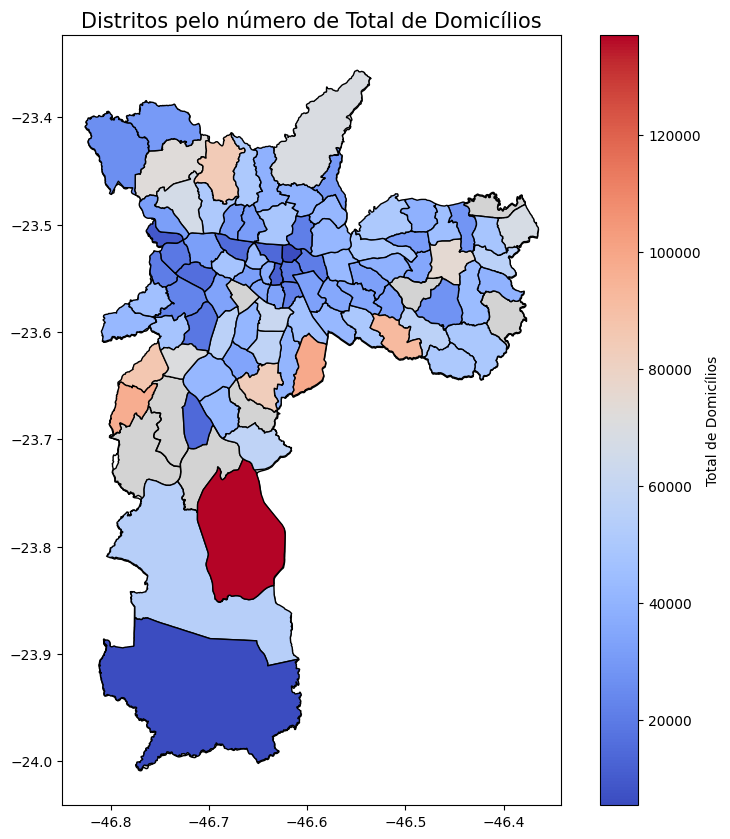

In [31]:
# Exemplo de uso para plotar 'Total de Domicílios', 'Domicílios HIS²', 'Domicílios HMP'
plotar_distritos_domicilios(sp_gdf, distritos_gdf, outras_analises, 'Total de Domicílios')


C:\Users\Denil\AppData\Local\Temp\ipykernel_2728\1347452035.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho


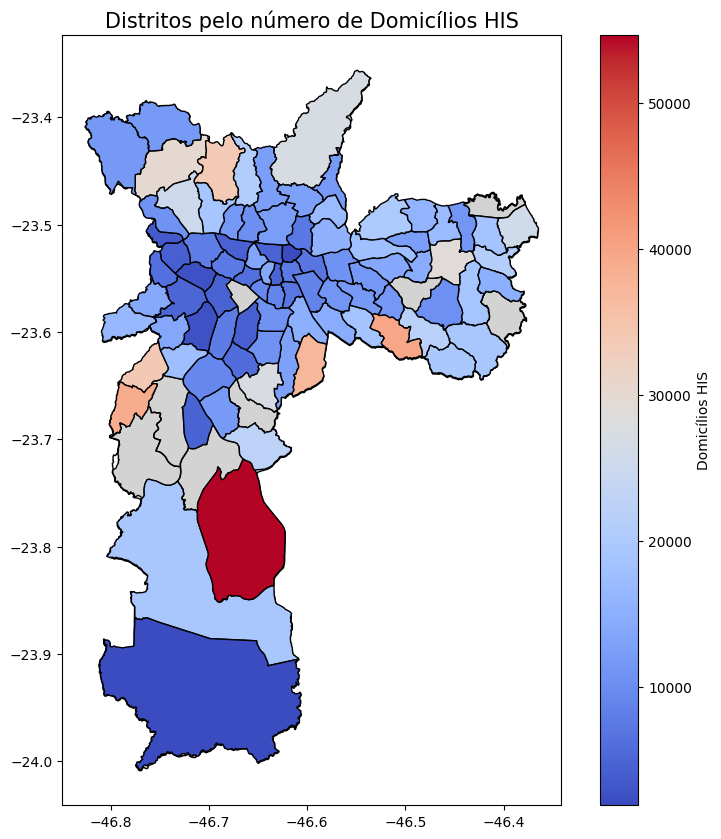

In [32]:
plotar_distritos_domicilios(sp_gdf, distritos_gdf, outras_analises, 'Domicílios HIS')

C:\Users\Denil\AppData\Local\Temp\ipykernel_2728\1347452035.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # Mapa de cores do azul ao vermelho


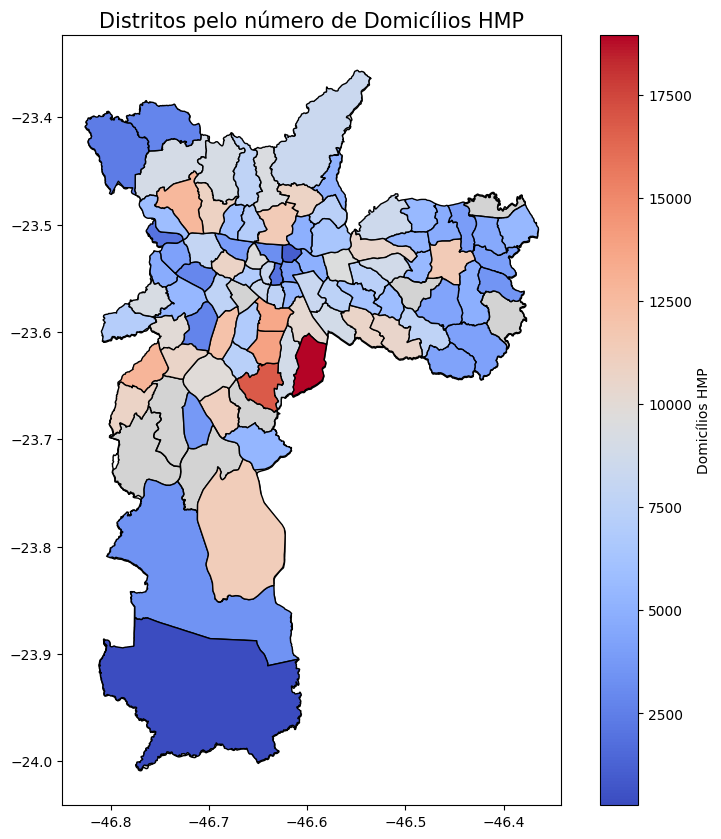

In [33]:
plotar_distritos_domicilios(sp_gdf, distritos_gdf, outras_analises, 'Domicílios HMP')


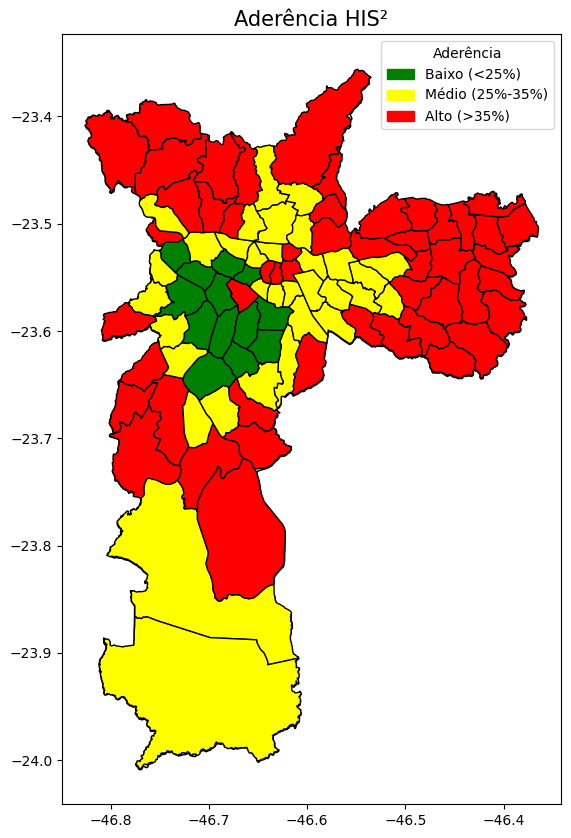

In [34]:
# Exemplo de uso para plotar aderência HIS² e HMP
plotar_distritos_aderencia(sp_gdf, distritos_gdf, outras_analises, 'Share HIS', 'Aderência HIS²')

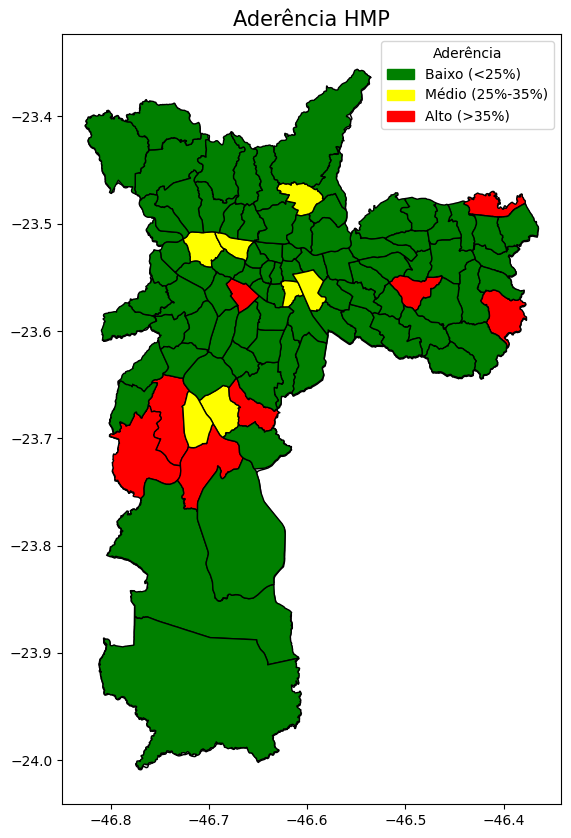

In [35]:
plotar_distritos_aderencia(sp_gdf, distritos_gdf, outras_analises, 'Share HMP', 'Aderência HMP')